In [ ]:
def affiche(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

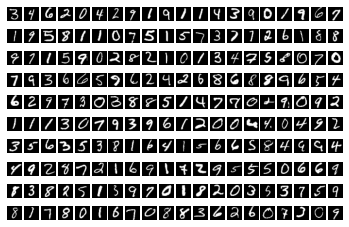

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Import libraries and modules
# Import libraries and modules
import numpy as np
import time
np.random.seed(123) # for reproducibility
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras import Sequential, Model, Input
from keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input
##################################################
# I - Load pre-shuffled MNIST data train and test sets
##################################################
from keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(X_train, y_train), (X_test, y_test) = load_data()
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9,
random_state=42)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9, random_state=42)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10)
print(type(y_test))
Y_test = tf.keras.utils.to_categorical(y_test, 10)
print(type(y_test))

In [ ]:
inputs = Input(shape=(28,28,1))
x = inputs
x=Flatten()(x)
outputs=Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


24/24 [==============================] - 1s 10ms/step - loss: 0.0744 - accuracy: 0.9868 - val_loss: 0.4289 - val_accuracy: 0.8900
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9863 - val_loss: 0.4266 - val_accuracy: 0.8920
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9865 - val_loss: 0.4273 - val_accuracy: 0.8900
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9865 - val_loss: 0.4282 - val_accuracy: 0.8900
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9858 - val_loss: 0.4276 - val_accuracy: 0.8940
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9862 - val_loss: 0.4284 - val_accuracy: 0.8910
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9860 - val_loss: 0.4306 - val_accuracy: 0.8930
Epoch 8/100
24/24 [=====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


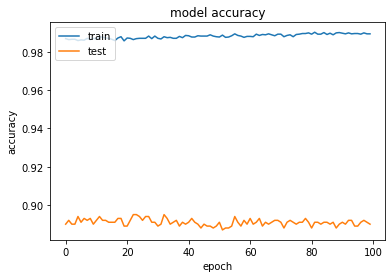

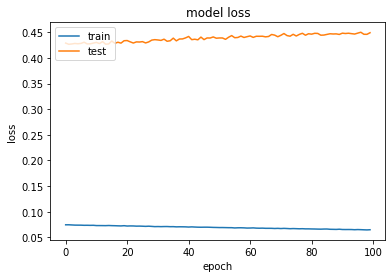

lr= 0.5 batch_size= 256 epochs= 100
Temps d apprentissage 12.033491999999995


In [ ]:
lr= 0.5
batch_size=256
epochs=100
sgd1= tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])
tps1 = time.clock()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.4255836606025696
Test accuracy: 88.99999856948853
Confusion Matrix
[[114   0   1   1   0   1   2   0   0   0]
 [  0 120   0   2   0   0   1   0   1   0]
 [  0   2  79   5   0   0   0   4   4   1]
 [  0   0   2  99   1   3   0   1   4   3]
 [  0   1   0   1  93   0   1   0   1   6]
 [  1   0   2   5   2  59   2   2   3   1]
 [  0   0   2   1   0   0  88   0   0   0]
 [  0   0   1   2   1   0   0  85   0   7]
 [  0   1   1   3   0   5   2   1  78   2]
 [  1   0   1   1   4   0   1   4   2  75]]
